In [10]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

# reading data
path_to_csv = "/tmp/tbots/yellow_test/path_summary.csv"
def read_csv(path):
    return pd.read_csv(path)

df = read_csv(path_to_csv)
print(df.columns)
df

Index(['sub_dest_x', 'sub_dest_y', 'connection_time', 'duration', 'start_x',
       'start_y', 'end_x', 'end_y', 'initial_vel(x)', 'initial_vel(y)', 'x1',
       'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6', 'x7',
       'y7', 'x8', 'y8', 'x9', 'y9', 'x10', 'y10', 'x11', 'y11', 'x12', 'y12',
       'x13', 'y13', 'x14', 'y14', 'x15', 'y15', 'x16', 'y16', 'x17', 'y17',
       'x18', 'y18', 'x19', 'y19', 'x20', 'y20'],
      dtype='object')


,sub_dest_x,sub_dest_y,connection_time,duration,start_x,start_y,end_x,end_y,initial_vel(x),initial_vel(y),...,x16,y16,x17,y17,x18,y18,x19,y19,x20,y20
0,0.100000,0.000000,0.2,2.22594,0,0,1.89549,0.834822,-0.437227,-1.504860,...,1.56302,0.518372,1.68271,0.633557,1.77580,0.722790,1.84229,0.786070,1.88219,0.823398
1,0.100000,0.000000,0.4,2.25037,0,0,1.89549,0.834822,-0.437227,-1.504860,...,1.52859,0.542730,1.66185,0.647883,1.76516,0.729669,1.83853,0.788087,1.88196,0.823139
2,0.100000,0.000000,0.6,2.28191,0,0,1.89549,0.834822,-0.437227,-1.504860,...,1.47624,0.586428,1.62733,0.675850,1.74480,0.745400,1.82865,0.795079,1.87888,0.824886
3,0.100000,0.000000,0.8,2.34096,0,0,1.89549,0.834822,-0.437227,-1.504860,...,1.42946,0.638215,1.59860,0.708994,1.72977,0.764044,1.82297,0.803365,1.87819,0.826958
4,0.100000,0.000000,1.0,2.51384,0,0,1.89549,0.834822,-0.437227,-1.504860,...,1.34500,0.655902,1.54545,0.720313,1.70071,0.770411,1.81079,0.806195,1.87568,0.827665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45862,0.309017,-0.951057,0.6,2.75685,0,0,-2.48841,-0.349458,1.410780,-0.570481,...,-1.87758,-0.696848,-2.09927,-0.571788,-2.27119,-0.474518,-2.39335,-0.405040,-2.46574,-0.363354
45863,0.309017,-0.951057,0.8,2.75539,0,0,-2.48841,-0.349458,1.410780,-0.570481,...,-1.85216,-0.661650,-2.08175,-0.549261,-2.26017,-0.461847,-2.38742,-0.399409,-2.46350,-0.361946
45864,0.309017,-0.951057,1.0,2.89037,0,0,-2.48841,-0.349458,1.410780,-0.570481,...,-1.74938,-0.601866,-2.01543,-0.509902,-2.22236,-0.438683,-2.37017,-0.388211,-2.45885,-0.358485
45865,0.669131,-0.743145,0.2,2.65041,0,0,-2.48841,-0.349458,1.410780,-0.570481,...,-1.86437,-0.559144,-2.08902,-0.483541,-2.26376,-0.424771,-2.38857,-0.382834,-2.46345,-0.357730


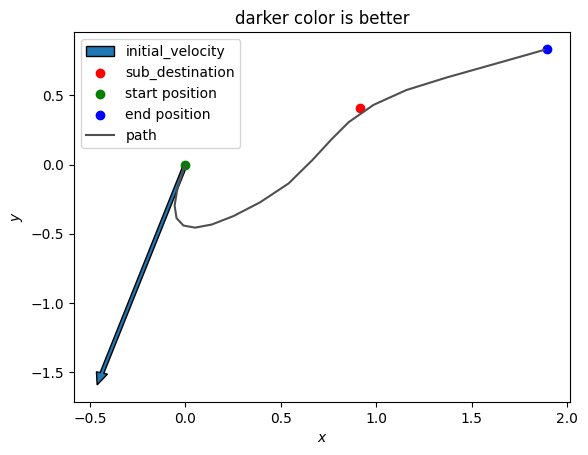

In [11]:
data_points_num = 20
max_duration = df["duration"].max() 
min_duration = df["duration"].min()

def extract_row(row):
    x = []
    y = []
    duration = row["duration"]
    for i in range(1, data_points_num + 1, 1):
        x.append(row[f"x{i}"])
        y.append(row[f"y{i}"])
    return np.array(x), np.array(y), duration


def plot_row(row):
    vel_x = row["initial_vel(x)"]
    vel_y = row["initial_vel(y)"]
    sub_dest_x = row["sub_dest_x"]
    sub_dest_y = row["sub_dest_y"]
    start_x = row["start_x"]
    start_y = row["start_y"]
    end_x = row["end_x"]
    end_y = row["end_y"]
    connection_time = row["connection_time"]
    
    x, y, duration = extract_row(row)
    standardized_color = (duration - min_duration ) / (max_duration - min_duration)
    color = (standardized_color,standardized_color, standardized_color)
    
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.arrow(start_x, start_y, vel_x, vel_y, label="initial_velocity", width=0.02)
    plt.scatter([sub_dest_x], [sub_dest_y], c="r", label="sub_destination")
    plt.scatter([start_x], [start_y], c="g", label="start position")
    plt.scatter([end_x], [end_y], c="b", label="end position")

    plt.title("darker color is better")
    plt.plot(x, y, c=color, label="path")
    
    plt.legend()
    plt.show()

row = df.loc[100]
plot_row(row)

In [12]:
"""
The following code plots all the trajectory that goes through a sub destination where 0.2 connection does not yield the best time. 
"""

# plot all the path for a given trajectory
start_x = df.iloc[10000]["start_x"]
start_y = df.iloc[10000]["start_y"]
end_x = df.iloc[10000]["end_x"]
end_y = df.iloc[10000]["end_y"]

# probably a smarter way to do this, I can't be bothered
start_x, start_y, end_x, end_y
trajectory_collection = df.loc[df["start_x"] == start_x]
trajectory_collection = df.loc[df["start_y"] == start_y]
trajectory_collection = df.loc[df["end_x"] == end_x]
trajectory_collection = df.loc[df["end_y"] == end_y]

minimum_index = trajectory_collection.groupby(["sub_dest_x", "sub_dest_y"])["duration"].idxmin()
fastest_trajectory_per_sub_destination = trajectory_collection.loc[minimum_index]
non_point_two_fastest_trajectory = fastest_trajectory_per_sub_destination[fastest_trajectory_per_sub_destination["connection_time"] != 0.2]

def plot_all_path_to_sub_dest(sub_dest_x, sub_dest_y, sub_df):
    paths = sub_df.loc[sub_df["sub_dest_x"] == sub_dest_x]
    paths = paths.loc[paths["sub_dest_y"] == sub_dest_y]
    paths = paths.sort_values("connection_time")

    fig, ax = plt.subplots() 
    # basic information
    vel_x = row["initial_vel(x)"]
    vel_y = row["initial_vel(y)"]
    sub_dest_x = row["sub_dest_x"]
    sub_dest_y = row["sub_dest_y"]
    start_x = row["start_x"]
    start_y = row["start_y"]
    end_x = row["end_x"]
    end_y = row["end_y"]

    # plotting basic stuff
    plt.title("All Trajectory of a Given Sub Point")
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.arrow(start_x, start_y, vel_x, vel_y, label="initial_velocity", width=0.02)
    plt.scatter([sub_dest_x], [sub_dest_y], c="r", label="sub_destination")
    plt.scatter([start_x], [start_y], c="g", label="start position")
    plt.scatter([end_x], [end_y], c="b", label="end position")

    # best connection_time
    best_connection_time = paths.loc[paths["duration"].idxmin()]["connection_time"]
    
    for path in paths.iloc:
        x, y, duration = extract_row(path)
        connection_time = path["connection_time"]

        if connection_time == 0.2:
            ax.plot(x, y, label="0.2 connection time", c="r", alpha=1.0)
        elif connection_time == best_connection_time: 
            ax.plot(x, y, label=f"{best_connection_time} best connection time", c="g", alpha=1)
        else:
            ax.plot(x, y, c="b", alpha=0.1)
            
    fig.legend()
            
# plotting all the trajectory where 0.2 connection time is not the fastest 
for row in non_point_two_fastest_trajectory.iloc():
    sub_dest_x = row["sub_dest_x"]
    sub_dest_y = row["sub_dest_y"]
    plot_all_path_to_sub_dest(sub_dest_x, sub_dest_y, trajectory_collection)

In [13]:
# calculating the probability of getting a path's whoes best path is not at connection time of 0.2

fastest_path_index = df.groupby(["start_x", "start_y", 'end_x', 'end_y', "sub_dest_x", "sub_dest_y"])["duration"].idxmin()
fastest_path_min_durations = df.loc[fastest_path_index]
not_point_two_count = (fastest_path_min_durations["connection_time"] != 0.2).sum()
total_number = len(fastest_path_min_durations)
p = not_point_two_count/total_number

print(f"Therefore, the probaility of finding a path whoe's connection time is not of 0.2 is p = {p:.4f}")

Therefore, the probaility of finding a path whoe's connection time is not of 0.2 is p = 0.0429


In [14]:
# calculating the average duration difference between fastest and 0.2 second connection time
# probabily a better way to do this

not_point_two_min_durations = fastest_path_rows.loc[fastest_path_rows["connection_time"] != 0.2]
not_point_two_rows = not_point_two_rows.sort_values(["sub_dest_x", 'sub_dest_y', 'start_x', 'start_y', 'end_x', 'end_y'])

point_two_rows = df.loc[df["connection_time"] == 0.2]
point_two_rows = point_two_rows[point_two_rows["sub_dest_x"].isin(not_point_two_rows["sub_dest_x"])]
point_two_rows = point_two_rows[point_two_rows["sub_dest_y"].isin(not_point_two_rows["sub_dest_y"])]
point_two_rows = point_two_rows.sort_values(["sub_dest_x", 'sub_dest_y', 'start_x', 'start_y', 'end_x', 'end_y'])

average_diff = np.sum(point_two_rows["duration"] - not_point_two_rows["duration"].to_numpy()) / len(not_point_two_rows["duration"].to_numpy())


f"the average difference is {average_diff:5f} s between the best and 0.2 second connection time path"

NameError: name 'fastest_path_rows' is not defined

# Conclusion: Hypothesis One

Based on the calculation above, about **7** percent of the time, hypothesis one is not true.


When the hypothesis is not true, the average difference between the two path is around **0.005186** seconds. 

## Theory on why 0.2 connection time may not always be the best

Sometimes, you may be able to curve down a bit more at a greater connection time. As such, the total duration would decrease as shown in the plots above.

## How is this tested 

I've randomly generated 100 trajectories in the Trajectory planner to test this.

**Side note: I think this is a bit incomplete because position is bounded between (0, 1) for both x and y.**

For the same start pos, end pos, start vel, we should draw the best trajectories for each subdestination

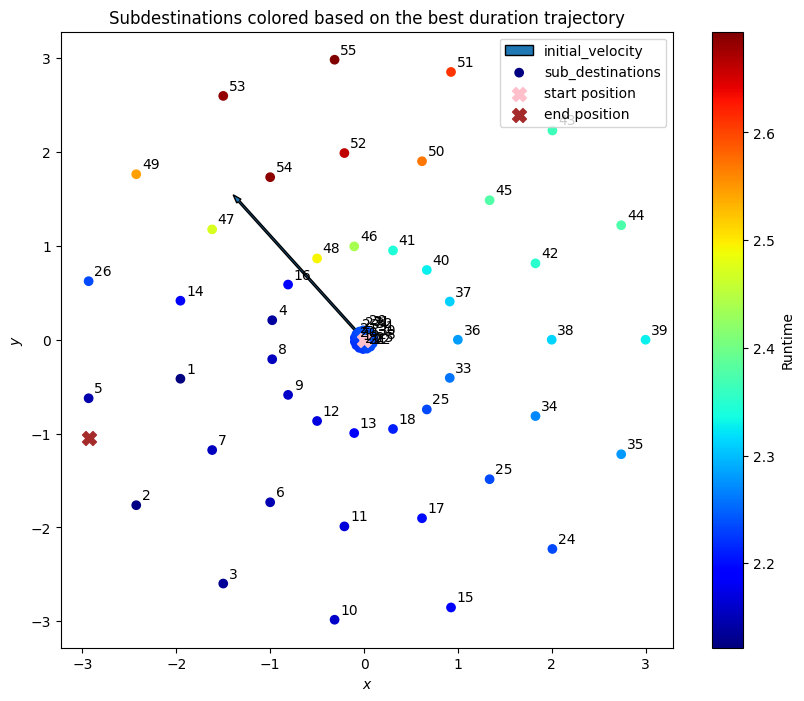

In [15]:
import matplotlib.cm as cm

grouped_find_traj_calls = df.groupby(["start_x", "start_y", 'end_x', 'end_y', "initial_vel(x)", "initial_vel(y)"])

# Get one of the find_traj calls data points
find_traj_call_index = 1
find_traj_call_data = grouped_find_traj_calls.get_group(list(grouped_find_traj_calls.groups.keys())[find_traj_call_index])

# Plot the best trajectories for each subdestination for the same initial velocity, start and end position
min_durations = find_traj_call_data.groupby(["sub_dest_x", "sub_dest_y"])["duration"].idxmin()
min_durations = find_traj_call_data.loc[min_durations]

# Sort the min_durations DataFrame by duration and assign a rank to each subtrajectory based on its duration
min_durations = min_durations.sort_values("duration")
min_durations["rank"] = min_durations["duration"].rank(method="dense")

# basic information
vel_x = min_durations["initial_vel(x)"].iloc[0]
vel_y = min_durations["initial_vel(y)"].iloc[0]
start_x = min_durations["start_x"].iloc[0]
start_y = min_durations["start_y"].iloc[0]
end_x = min_durations["end_x"].iloc[0]
end_y = min_durations["end_y"].iloc[0]

sub_dest_x = min_durations["sub_dest_x"]
sub_dest_y = min_durations["sub_dest_y"]

# Create a list of colors based on the duration
durations = min_durations["duration"]
min_duration = durations.min()
max_duration = durations.max()

standardized_colors = (durations - min_duration) / (max_duration - min_duration)
colors = [(c, c, c) for c in standardized_colors]

# plotting basic stuff
fig, ax = plt.subplots() 
plt.title("Subdestinations colored based on the best duration trajectory")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.arrow(start_x, start_y, vel_x, vel_y, label="initial_velocity", width=0.02)

# Add a colorbar to show how the color range relates to the runtime
sc = plt.scatter(sub_dest_x, sub_dest_y, c=durations, label="sub_destinations", cmap=cm.jet)
plt.colorbar(sc, label='Runtime')

# Add numbers next to each scatter plot point for the sub_destinations based on the ordered duration ranking
for x, y, rank in zip(sub_dest_x, sub_dest_y, min_durations["rank"]):
    ax.text(x + 0.06, y + 0.06, str(int(rank)), fontsize=10)

plt.scatter([start_x], [start_y], c="pink", label="start position", marker="X", s=100)
plt.scatter([end_x], [end_y], c="brown", label="end position", marker="X", s=100)
plt.legend()

# show plot a bit bigger but with equal x and y proportions
ax.set_aspect('equal', adjustable='box')
fig.set_size_inches(10, 8)